# Batch PDF processing

Dan Keemahill ([@dankeemahill](https://twitter.com/dankeemahill))

https://github.com/dankeemahill/nicar20-batch-pdf-processing

## Welcome!

In this hourlong session, we will walk through **Python** code that extracts data from **nine PDFs**.

### What if I need to parse bigger batches of PDFs, like 1,000 or 10,000 or 1,000,000 or... ?

- Check out [how ICIJ mined 715,000 records](https://www.icij.org/investigations/luanda-leaks/how-we-mined-more-than-715000-luanda-leaks-records/) with their open-source tool [Datashare](https://www.icij.org/blog/2019/11/what-is-datashare-frequently-asked-questions-about-our-document-analysis-software/)

- Check out Miguel Barbosa's 2018 [presentation](https://docs.google.com/presentation/d/12ShGfr3HhSXdLwK5R1pr1J5cvjLXuEmaXGxErG3gShg/preview)

- Check out Jacob Fenton's [session](https://ireapps.github.io/nicar-2020-schedule#20200308_pdf_3_batch_pdf_processing_repeat_2478) on Sunday

### Concepts apply no matter how many PDFs you have

- Know the types of PDFs
- Trial and error
- Divide and conquer
- Check the facts
- [Collaborate!](https://source.opennews.org/articles/news-nerds-against-pdfs/)


### The challenge

ICE has a [page](https://www.ice.gov/facility-inspections) of detention facility inspections in PDF. Most inspections involve a "cover letter" that lists violations standards and their components and a "summary review form" that tabulates incidents and provides narratives.

For a USA TODAY Network [investigation](https://www.usatoday.com/in-depth/news/nation/2019/12/19/ice-detention-private-prisons-expands-under-trump-administration/4393366002/) of private prisons that detain immigrants, we wanted to count violations from these reports.

In this notebook, I'll demonstrate parsing grievances filed from summary forms with [pdfplumber](https://github.com/jsvine/pdfplumber).

### Why [pdfplumber](https://github.com/jsvine/pdfplumber)?

There are many open-source tools that can work with PDFs! The [2019 Q4 IRE Journal](https://www.ire.org/wp-content/uploads/2019/12/IREJournal_Q4_2019.pdf) had a useful list of tools 

I turned to pdfplumber for a few reasons: I'm familiar with python, I had previous experience with pdfplumber and because pdfplumber was built by journalist Jeremy Singer-Vine and [contributors](https://github.com/jsvine/pdfplumber#acknowledgments--contributors).

Most importantly, I was confident pdfplumber could work for the task because the PDFs were of the "native" [type](https://docs.google.com/presentation/d/12ShGfr3HhSXdLwK5R1pr1J5cvjLXuEmaXGxErG3gShg/preview?slide=id.g1ebfd012eb_0_40).

### Getting to know the PDFs

In [1]:
# examine the directory
!ls pdf/

LAWINCI_SIS_10-10-2019.pdf
RVRCCLA_SIS_10-24-2019.pdf
RWCCMLA_SIS_10-03-2019.pdf
RiverCorrectionalCenter_SIS_12-06-2018.pdf
allenParishDetFac_SIS_02-14-2019.pdf
catahoulaLA_SIS_08-22-2019.pdf
jenaLaSalle_SIS_09-26-2019.pdf
natchitochesDcLA_SIS_07-03-2019.pdf


In [2]:
import pdfplumber

In [3]:
pdf = pdfplumber.open(
    'pdf/jenaLaSalle_SIS_09-26-2019.pdf'
)

In [4]:
pdf.pages

In [5]:
# how many pages does this PDF have?

len(pdf.pages)

9

In [6]:
# get the first page

page = pdf.pages[0]

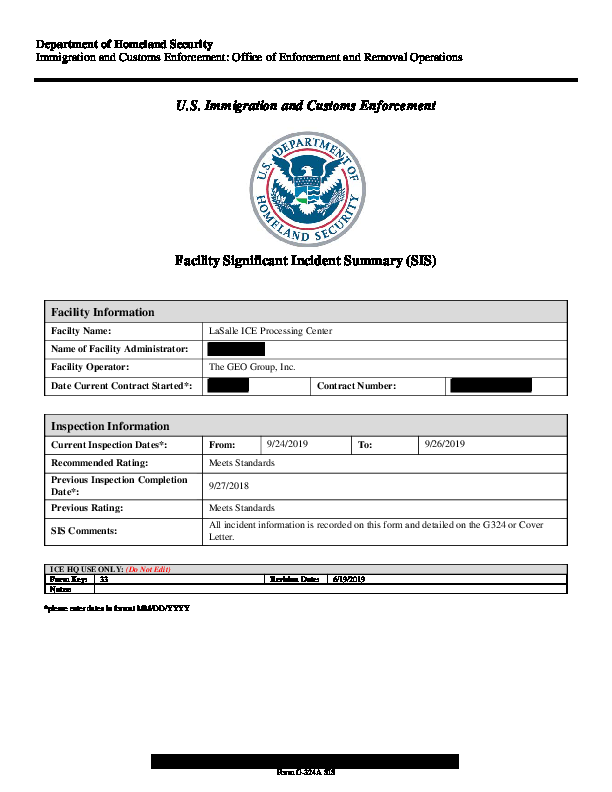

In [7]:
# what does the first page look like?

page.to_image()

### Where are the grievances in this PDF?

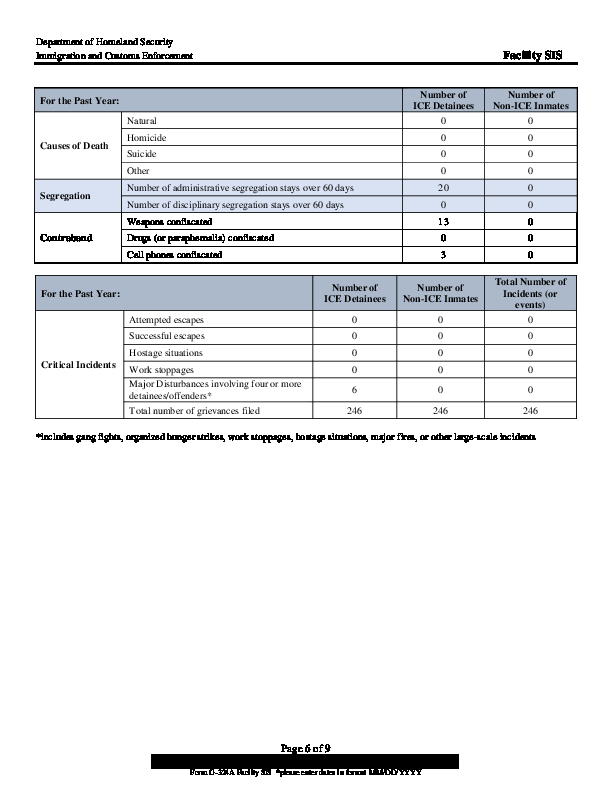

In [8]:
page = pdf.pages[5]
page.to_image()

### Find the grievances in a different PDF

In [9]:
pdf = pdfplumber.open(
    'pdf/allenParishDetFac_SIS_02-14-2019.pdf'
)

In [10]:
page = pdf.pages[5]

IndexError: list index out of range

_Oh snap!_ What happened?

In [11]:
len(pdf.pages)

4

### Collect metadata about our PDFs

We have just learned that different PDFs have different numbers of pages. This is a great chance to learn more about our documents by creating metadata about them.

How many pages does each PDF have?

In [12]:
# import a python library that helps us find batches of files

from glob import glob

In [13]:
glob('pdf/*')

['pdf/RiverCorrectionalCenter_SIS_12-06-2018.pdf',
 'pdf/catahoulaLA_SIS_08-22-2019.pdf',
 'pdf/RVRCCLA_SIS_10-24-2019.pdf',
 'pdf/LAWINCI_SIS_10-10-2019.pdf',
 'pdf/RWCCMLA_SIS_10-03-2019.pdf',
 'pdf/natchitochesDcLA_SIS_07-03-2019.pdf',
 'pdf/jenaLaSalle_SIS_09-26-2019.pdf',
 'pdf/allenParishDetFac_SIS_02-14-2019.pdf']

In [14]:
# display each PDF and the number of pages it has

for file_name in glob('pdf/*'):
    pdf = pdfplumber.open(file_name)
    print(
        file_name,
        len(pdf.pages)
    )

pdf/RiverCorrectionalCenter_SIS_12-06-2018.pdf 4
pdf/catahoulaLA_SIS_08-22-2019.pdf 4
pdf/RVRCCLA_SIS_10-24-2019.pdf 9
pdf/LAWINCI_SIS_10-10-2019.pdf 9
pdf/RWCCMLA_SIS_10-03-2019.pdf 9
pdf/natchitochesDcLA_SIS_07-03-2019.pdf 4
pdf/jenaLaSalle_SIS_09-26-2019.pdf 9
pdf/allenParishDetFac_SIS_02-14-2019.pdf 4


In [15]:
# import a python library that helps us work with data

import pandas as pd

In [16]:
# make a list of dictionaries that contain metadata

payload = []

for file_name in glob('pdf/*'):
    pdf = pdfplumber.open(file_name)
    payload.append({
        'file_name': file_name,
        'pages': len(pdf.pages)
    })

payload

[{'file_name': 'pdf/RiverCorrectionalCenter_SIS_12-06-2018.pdf', 'pages': 4},
 {'file_name': 'pdf/catahoulaLA_SIS_08-22-2019.pdf', 'pages': 4},
 {'file_name': 'pdf/RVRCCLA_SIS_10-24-2019.pdf', 'pages': 9},
 {'file_name': 'pdf/LAWINCI_SIS_10-10-2019.pdf', 'pages': 9},
 {'file_name': 'pdf/RWCCMLA_SIS_10-03-2019.pdf', 'pages': 9},
 {'file_name': 'pdf/natchitochesDcLA_SIS_07-03-2019.pdf', 'pages': 4},
 {'file_name': 'pdf/jenaLaSalle_SIS_09-26-2019.pdf', 'pages': 9},
 {'file_name': 'pdf/allenParishDetFac_SIS_02-14-2019.pdf', 'pages': 4}]

In [17]:
# make a dataframe of the metadata and display the dataframe

pdf_meta = pd.DataFrame(
    payload
)

pdf_meta

,file_name,pages
0,pdf/RiverCorrectionalCenter_SIS_12-06-2018.pdf,4
1,pdf/catahoulaLA_SIS_08-22-2019.pdf,4
2,pdf/RVRCCLA_SIS_10-24-2019.pdf,9
3,pdf/LAWINCI_SIS_10-10-2019.pdf,9
4,pdf/RWCCMLA_SIS_10-03-2019.pdf,9
5,pdf/natchitochesDcLA_SIS_07-03-2019.pdf,4
6,pdf/jenaLaSalle_SIS_09-26-2019.pdf,9
7,pdf/allenParishDetFac_SIS_02-14-2019.pdf,4


We know these records are different page lengths, but where are the grievance tables in each PDF?

### Find patterns in text with regular expressions

Let's practice!

In [18]:
import re

We want to find pages that contain "Grievances:" `OR` "grievances"

In [19]:
pattern_grievance_table = r'Grievances:|grievances'

"Even just learning how to write a simple loop is very helpful to convert PDFs." - Todd Wallack, [NICAR 2017](https://www.ire.org/resource-center/audio/1223/)

In [20]:
payload = []

# loop over all the PDF files in the directory

for file_name in glob('pdf/*'):
    pdf = pdfplumber.open(file_name)
    
    # loop over each page in the opened PDF
    
    for page_index, page in enumerate(pdf.pages):

        if re.search(
                pattern_grievance_table,
                page.extract_text()
            ):
            
            # add metadata to the list if the grievance pattern is found

            payload.append({
                'file_name': file_name,
                'table_page': page_index
            })
            
            
pdf_grievance_pages = pd.DataFrame(payload)

In [21]:
pdf_meta = pdf_grievance_pages.merge(
    pdf_meta,
    on='file_name'
)

pdf_meta

,file_name,table_page,pages
0,pdf/RiverCorrectionalCenter_SIS_12-06-2018.pdf,1,4
1,pdf/catahoulaLA_SIS_08-22-2019.pdf,1,4
2,pdf/RVRCCLA_SIS_10-24-2019.pdf,5,9
3,pdf/LAWINCI_SIS_10-10-2019.pdf,5,9
4,pdf/RWCCMLA_SIS_10-03-2019.pdf,5,9
5,pdf/natchitochesDcLA_SIS_07-03-2019.pdf,1,4
6,pdf/jenaLaSalle_SIS_09-26-2019.pdf,5,9
7,pdf/allenParishDetFac_SIS_02-14-2019.pdf,1,4


Now we know where the grievance data are on each document. Time to parse!

### Parse a single PDF

In [22]:
# get metadata for a PDF

pdf_row = pdf_meta.loc[
    lambda x: x['file_name'] == 'pdf/allenParishDetFac_SIS_02-14-2019.pdf'
].iloc[0]

pdf_row

file_name     pdf/allenParishDetFac_SIS_02-14-2019.pdf
table_page                                           1
pages                                                4
Name: 7, dtype: object

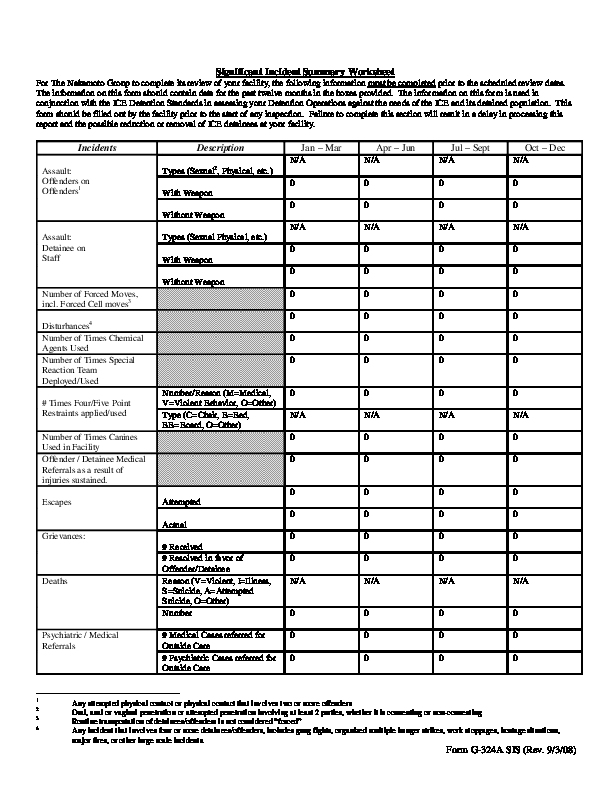

In [23]:
pdf = pdfplumber.open(pdf_row['file_name'])

# use our metadata to open the page with the grievance data and view it

page = pdf.pages[
    pdf_row['table_page']
]

page.to_image()

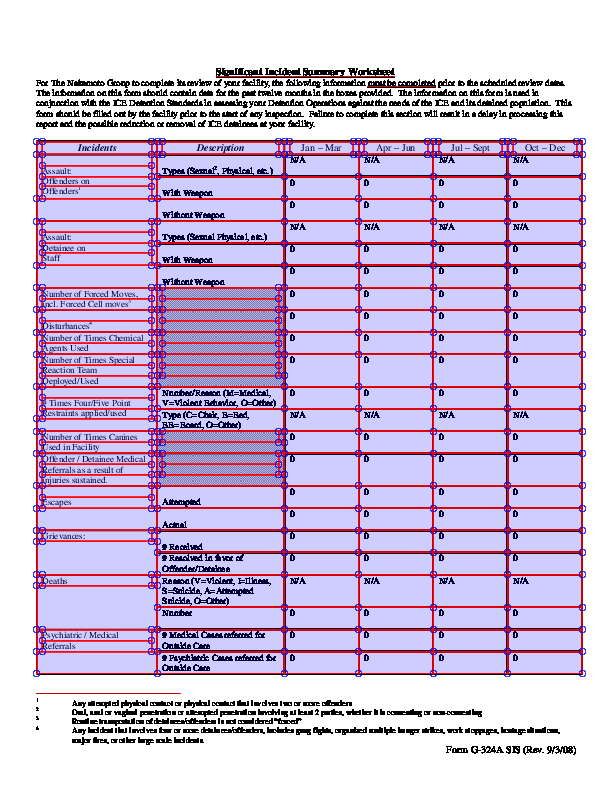

In [24]:
# use the pdfplumber tablefinder!

page.to_image().debug_tablefinder()

The debugger looks messy because the PDF has inconsistent rows.

We could parse the whole page and clean it up as a second step, but we can also zoom in to a smaller area and extract it with more accuracy.

In this case, we just want the "Greivances Received" row. We can `crop` the page using pixel coordinates.

pdfplumber can crop pdfs with bounding boxes, which are `"4-tuple with the values (x0, top, x1, bottom)"`

Another way to remember it: `(left, top, right, bottom)`

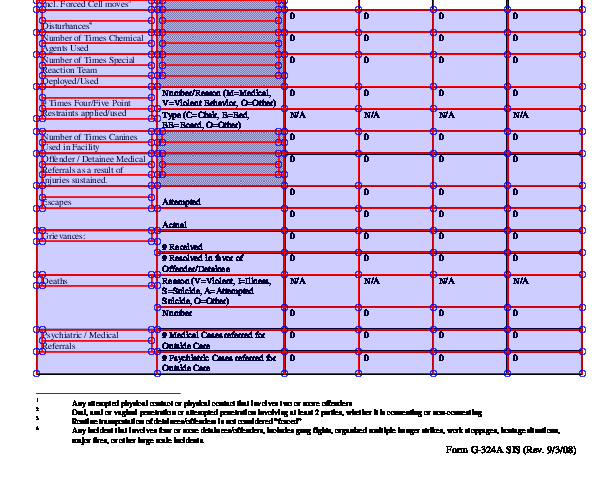

In [25]:
crop_coordinates = (0, 300, page.width, page.height)

page_cropped = page.crop(crop_coordinates)

page_cropped.to_image().debug_tablefinder()

Getting the coordinates exactly right can be tricky.

I opened a PDF in Adobe Illustrator and used its interface to find coordinates, but we can also use pdfplumber to find coordinates.

pdfplumber provides the coordinates of `words`, we can use those coordinates to determine where we should crop.

In [ ]:
page.extract_words()

In [26]:
coordinate_grievances = list(filter(
    lambda x: x['text'] == 'Grievances:',
    page.extract_words()
))[0]

coordinate_grievances

{'x0': Decimal('42.240'),
 'x1': Decimal('85.576'),
 'top': Decimal('529.795'),
 'bottom': Decimal('542.080'),
 'text': 'Grievances:'}

Trial and error!

In [27]:
coordinate_left = coordinate_grievances['x1'] + 100
coordinate_right = page.width
coordinate_top = coordinate_grievances['top'] - 5
coordinate_bottom = coordinate_grievances['top'] + 30

In [28]:
crop_coordinates = (coordinate_left, coordinate_top, coordinate_right, coordinate_bottom)

crop_coordinates

(Decimal('185.576'),
 Decimal('524.795'),
 Decimal('612.000'),
 Decimal('559.795'))

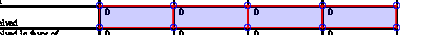

In [29]:
page.within_bbox(
    crop_coordinates
).to_image().debug_tablefinder()

Much better, let's get the table!

In [30]:
extracted_table = page.within_bbox(
    crop_coordinates
).extract_table()

extracted_table

[['0', '0', '0', '0']]

The data are just one row, but let's make a pandas DataFrame out of it.

In [32]:
pd.DataFrame(
    extracted_table,
    columns=['q1', 'q2', 'q3', 'q4']
).astype(int).assign(
    total = lambda x: x.sum(axis=1),
    file=file_name
)

,q1,q2,q3,q4,total,file
0,0,0,0,0,0,pdf/allenParishDetFac_SIS_02-14-2019.pdf


Now let's extract grievances from a nine-page PDF.

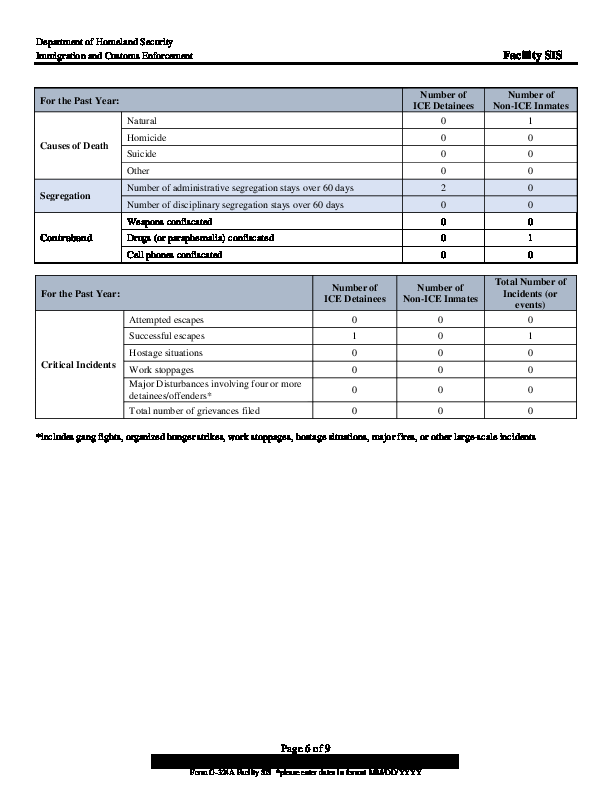

In [33]:
pdf_row = pdf_meta.loc[
    lambda x: x['pages'] == 9
].iloc[0]

pdf = pdfplumber.open(pdf_row['file_name'])

page = pdf.pages[
    pdf_row['table_page']
]

page.to_image()

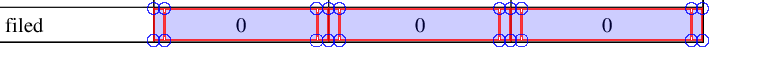

In [34]:
coordinate_grievances = list(filter(
    lambda x: x['text'] == 'grievances',
    page.extract_words()
))[0]

# I found these exact values after trial and error!
coordinate_left = coordinate_grievances['x1']
coordinate_right = page.width
coordinate_top = coordinate_grievances['top'] - 5
coordinate_bottom = coordinate_grievances['top'] + 30

crop_coordinates = (coordinate_left, coordinate_top, coordinate_right, coordinate_bottom)

page.within_bbox(
    crop_coordinates
).to_image(resolution=150).debug_tablefinder()

The crop looks close, but notice tablefinder is adding more lines than we need. We can use one of the many pdfplumber [table settings](https://github.com/jsvine/pdfplumber#table-extraction-settings) to fine tune the table. In this case, I found the `snap_tolerance` setting helped with the multiple lines.

In [35]:
pd.DataFrame(
    page.within_bbox(
        crop_coordinates
    ).extract_table({
        'snap_tolerance': 8
    }),
    columns = [
        'ice',
        'non_ice',
        'total'
    ]
).astype(int).assign(
    file=file_name
)

,ice,non_ice,total,file
0,0,0,0,pdf/allenParishDetFac_SIS_02-14-2019.pdf


We've extracted data from a 4-page PDF and a 9-page PDF, and we can apply these techniques to our entire batch.

"Even just learning how to write a simple loop is very helpful to convert PDFs." - Todd Wallack, [NICAR 2017](https://www.ire.org/resource-center/audio/1223/)

In [36]:
def process_row(row):
    pdf = pdfplumber.open(row['file_name'])
    page = pdf.pages[row['table_page']]
    page_count = row['pages']
    
    coordinate_grievances = list(filter(
        lambda x: re.search(
            pattern_grievance_table, x['text']
        ),
        page.extract_words()
    ))[0]
    
    coordinate_left = coordinate_grievances['x1']
    coordinate_right = page.width
    
    if row['pages'] == 9:
        coordinate_top = coordinate_grievances['top'] - 5
        coordinate_bottom = coordinate_grievances['top'] + 30
        
    else:
        coordinate_left = coordinate_left + 100
        coordinate_top = coordinate_grievances['top'] - 5
        coordinate_bottom = coordinate_grievances['top'] + 30

    crop_coordinates = (coordinate_left, coordinate_top, coordinate_right, coordinate_bottom)
        
    page = page.within_bbox(crop_coordinates)
    
    if page_count == 9:
        return pd.DataFrame(
            page.extract_table({
                'snap_tolerance': 8
            }),
            columns = [
                'ice',
                'non_ice',
                'total'
            ]
        ).astype(int).assign(
            total=lambda x: x['ice'] + x['non_ice'],
            file=row['file_name']
        )

    else:
        return pd.DataFrame(
            page.extract_table(),
            columns=[
                'q1',
                'q2',
                'q3',
                'q4'
            ]
        ).astype(int).assign(
            total=lambda x: x.sum(axis=1),
            file=row['file_name']
        )


Our function is ready, let's run it on all the PDFs!

In [37]:
payload = []

for index, row in pdf_meta.iterrows():
    payload.append(process_row(row))

ValueError: invalid literal for int() with base 10: 'N/A'

Where is `'N/A'` coming from?

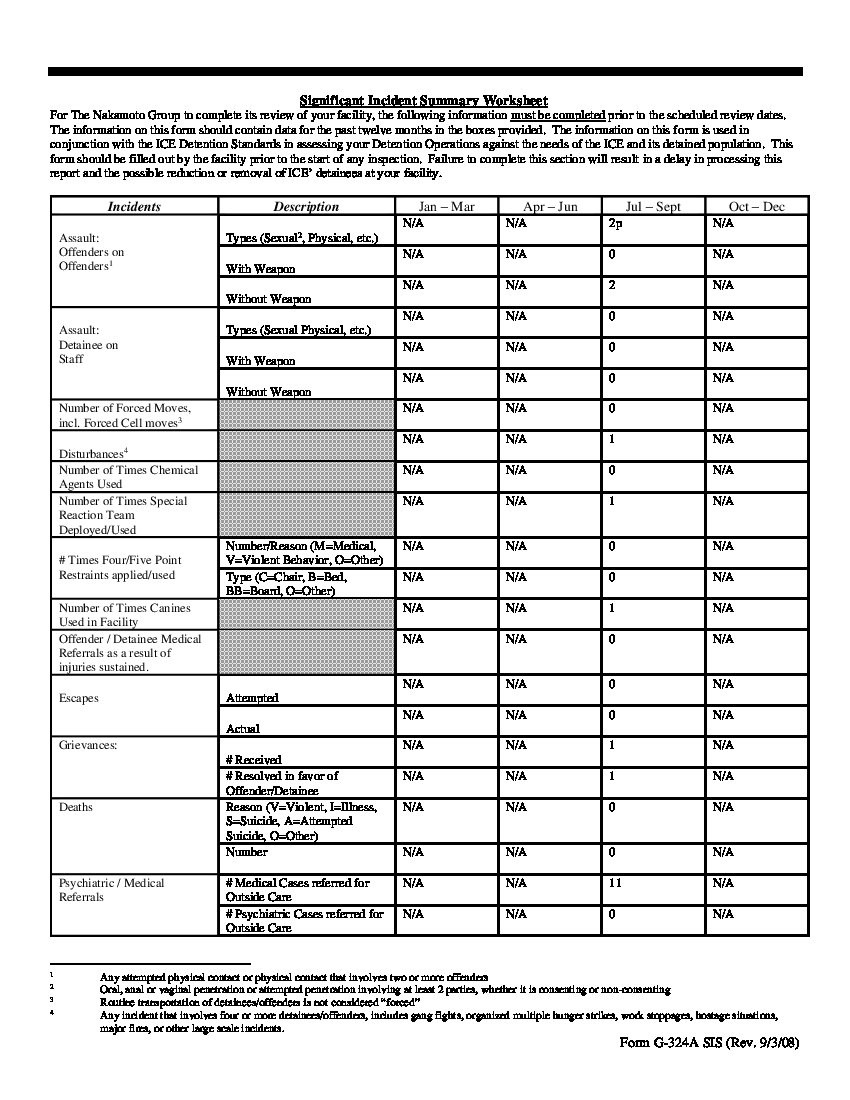

In [38]:
pdfplumber.open(
    pdf_meta.iloc[1]['file_name']
).pages[
    pdf_meta.iloc[1]['table_page']
].to_image(resolution=100)

Our function needs a tweak to convert `'N/A'` to `0` so we can add up grievances.

In [39]:
def process_row(row):
    pdf = pdfplumber.open(row['file_name'])
    page = pdf.pages[row['table_page']]
    page_count = row['pages']
    
    coordinate_grievances = list(filter(
        lambda x: re.search(
            pattern_grievance_table, x['text']
        ),
        page.extract_words()
    ))[0]
    
    coordinate_left = coordinate_grievances['x1']
    coordinate_right = page.width
    
    if row['pages'] == 9:
        coordinate_top = coordinate_grievances['top'] - 5
        coordinate_bottom = coordinate_grievances['top'] + 30
        
    else:
        coordinate_left = coordinate_left + 100
        coordinate_top = coordinate_grievances['top'] - 5
        coordinate_bottom = coordinate_grievances['top'] + 30

    crop_coordinates = (coordinate_left, coordinate_top, coordinate_right, coordinate_bottom)
        
        
    page = page.within_bbox(crop_coordinates)
    
    if page_count == 9:
        return pd.DataFrame(
            page.extract_table({
                'snap_tolerance': 8
            }),
            columns = [
                'ice',
                'non_ice',
                'total'
            ]
        ).astype(int).assign(
            total=lambda x: x['ice'] + x['non_ice'],
            file=row['file_name']
        )

    else:
        return pd.DataFrame(
            page.extract_table(),
            columns=[
                'q1',
                'q2',
                'q3',
                'q4'
            ]
        ).replace('N/A', 0).astype(int).assign(
            total=lambda x: x.sum(axis=1),
            file=row['file_name']
        )

In [40]:
payload = []

for index, row in pdf_meta.iterrows():
    payload.append(process_row(row))

In [41]:
pd.concat(payload)[['file', 'total']]

,file,total
0,pdf/RiverCorrectionalCenter_SIS_12-06-2018.pdf,106
0,pdf/catahoulaLA_SIS_08-22-2019.pdf,1
0,pdf/RVRCCLA_SIS_10-24-2019.pdf,0
0,pdf/LAWINCI_SIS_10-10-2019.pdf,22
0,pdf/RWCCMLA_SIS_10-03-2019.pdf,1
0,pdf/natchitochesDcLA_SIS_07-03-2019.pdf,0
0,pdf/jenaLaSalle_SIS_09-26-2019.pdf,492
0,pdf/allenParishDetFac_SIS_02-14-2019.pdf,0


## Look at all the PDFs we parsed!

But processing actually invovled quite a few things. We:

- created pandas data frames about our data
- wrote `for` loops
- used regular expressions
- filtered lists
- used trial-and-error to find the perfect PDF coordinates
- debugged errors

pdfplumber helped collect data from the reports, but we also used [Overview](https://blog.overviewdocs.com/) to search text and OCR non-machine-readable documents we encountered.